<div>
<img  style="float: left; padding-right: 100px; width: 350px" src="https://udom-ai-community.github.io/udomaicommunity/assets/img/portfolio/fullsize/logo-udomai.png">
    </div>
    <h2 align="center">MACHINE LEARNING USING PYTHON</h2>
<hr>
<h4 align="center">Innocent Charles</h4>
<h4 align="center">December 10, 2021</h4>
<hr>
<br>
<br>
<h2 align="center">Simple Linear Regression using scikit-learn</h2>

### <u>OUTLINE</u>
- Introduction to Scikit-Learn
 - Basic Scikit-Learn Concepts
 - Scikit-Learn Design
- Solving ML linear regression problem using Scikit-Learn



## 1.Introduction
#### 1.1.Scikit-Learn
Scikit-Learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms.
- It provides many unsupervised learning algorithms.It's built upon some of the technologies such as :
 - NumPy
 - pandas and
 - Matplotlib
- It is also used for data wrangling and data analysis.

#### 1.2.Scikit-learn design
Scikit-Learn library is organized in three fundamental APIs(Interfaces):
 - Estimator
 - Predictor
 - Transformer


## Metric

1. Mean absolute error
2. Mean Squared Error 
3. Root Mean squared error

## Data description
The data has been split into two groups:

- training set (Train.csv)
- test set (Test.csv) // unseen actual data

### Key issues

1. Understand your problem 
2. Understand your data
3. Write readable and reusable code
4. Use arg parse and logging module
5. Choose appropriate metric for your problem

In [1]:
#Mounting the drive.
#uncomment this if you use google colab to run this notebook !!!

# from google.colab import drive 
# drive.mount("/content/drive")

<h3>IMPORTING THE LIBRARY</h3>

In [2]:
#importing the important libraries
import pandas as pd #used for dataframe and series manipulation 
import numpy as np  #used for numpy array and mathematical calculation 
import seaborn as sns  #used for visualization 
import matplotlib.pyplot as plt #used for visualization
import matplotlib_inline #plot the graphs inside the notebook
from sklearn.preprocessing import LabelEncoder #for encoding the categorical values to numericals 
from sklearn.linear_model import LinearRegression #algorithm 
from sklearn.model_selection import train_test_split #cross validation for splitting the data into training  and testing 
from sklearn.metrics import mean_absolute_error #loss or cost function to evaluate the models
import warnings #import warnings
warnings.filterwarnings("ignore") #used to ignore the warnings 

<h3>LOADING THE DATA</h3>

In [3]:
#loading the data
pd.set_option("display.max_columns",70000) #expand the maximum columns to display the dataset 
pd.set_option("display.max_rows",None) #expanding the rows 
pd.set_option("display.width",90000) #expanding the width to display the large dataset 
#loading the dataset 
train=pd.read_csv("/media/xviii_6/XVIII_6/Projects/UDOM AI WORKSHOP/Data sets/Train.csv")
test=pd.read_csv("/media/xviii_6/XVIII_6/Projects/UDOM AI WORKSHOP/Data sets/Test.csv")
variable_definition=pd.read_csv("/media/xviii_6/XVIII_6/Projects/UDOM AI WORKSHOP/Data sets/VariableDefinitions.csv")
samplesub=pd.read_csv("/media/xviii_6/XVIII_6/Projects/UDOM AI WORKSHOP/Data sets/SampleSubmission.csv")

<h3>EDA (EXPLORATORY DATA ANALYIS)</h3>

In [4]:
train.head()#looking at first  five column of the train dataset 

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [5]:
train.tail() #looking at last five columns of the train dataset 

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,No,No,No,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,Yes,Yes,Yes,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0
4808,tour_999,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,No,4.0,7.0,Cash,Yes,Friendly People,13260000.0


In [6]:
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,Yes,Yes,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [7]:
test.tail()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
1596,tour_988,UNITED STATES OF AMERICA,25-44,NaN,0.0,1.0,Meetings and Conference,Mountain climbing,"Newspaper, magazines,brochures",Independent,No,No,No,No,No,No,No,1,0,Cash,No,NaN
1597,tour_990,ITALY,45-64,Spouse and Children,3.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,No,Yes,Yes,Yes,Yes,No,No,10,5,Other,Yes,Wildlife
1598,tour_992,FINLAND,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,No,No,No,No,No,No,No,6,0,Cash,Yes,No comments
1599,tour_996,SOUTH AFRICA,24-Jan,Alone,0.0,1.0,Business,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,4,0,Cash,Yes,Wildlife
1600,tour_998,SOUTH AFRICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Cultural tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,9,5,Cash,Yes,Friendly People


In [8]:
variable_definition #printing the definition of the variables 

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [9]:
samplesub.head()

,ID,total_cost
0,tour_1,0
1,tour_100,0
2,tour_1001,0
3,tour_1006,0
4,tour_1009,0


In [10]:
train.shape ,test.shape,samplesub.shape  #looking the dimension of the datasets

((4809, 23), (1601, 22), (1601, 2))

In [11]:
train.dtypes #checking the data types

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64
dtype: object

In [12]:
train.isnull().sum() #checking the null values in a dataset 

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [13]:
test.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

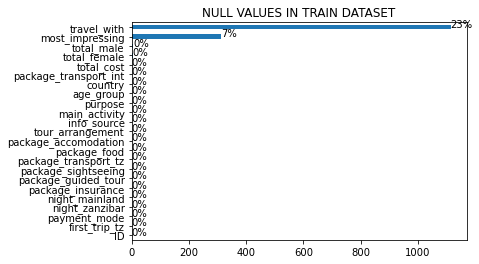

In [14]:
#use graphs to visualize the null values 
group=train.isnull().sum().sort_values().plot(kind="barh")
plt.title("NULL VALUES IN TRAIN DATASET")
for p in group.patches:
    z=((p.get_width()/train.shape[0])*100)
    per="{:,.0f}%".format(z)
    height=p.get_height()
    width=p.get_width()
    x=p.get_x()+width + 0.02 
    y=p.get_y()+height/2
    plt.annotate(per,(x,y))

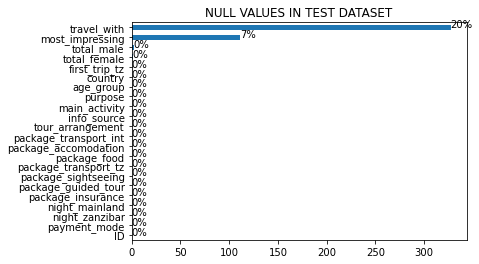

In [15]:
group=test.isnull().sum().sort_values().plot(kind="barh")
plt.title("NULL VALUES IN TEST DATASET")
for p in group.patches:
    z=((p.get_width()/test.shape[0])*100)
    per="{:,.0f}%".format(z)
    height=p.get_height()
    width=p.get_width()
    x=p.get_x()+width + 0.02 
    y=p.get_y()+height/2
    plt.annotate(per,(x,y))

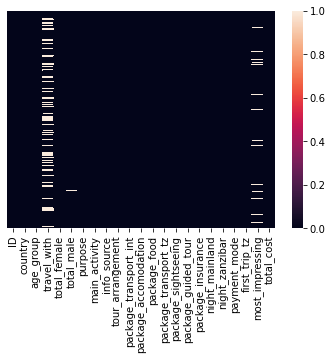

In [16]:
#use heatmap to visualize the columns with mostly having null values 
sns.heatmap(train.isnull(),yticklabels=False,linecolor="yellow")
plt.show()

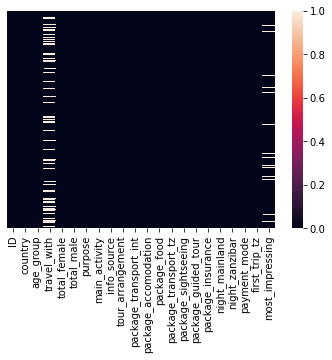

In [17]:
sns.heatmap(test.isnull(),yticklabels=False,linecolor="yellow")
plt.show()

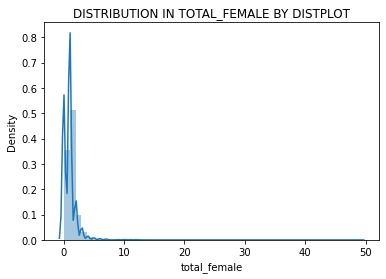

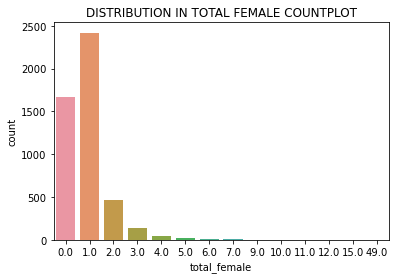

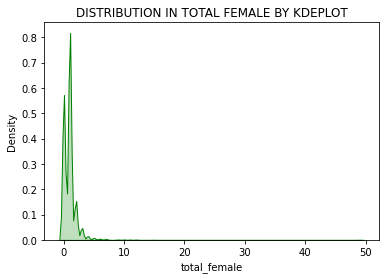

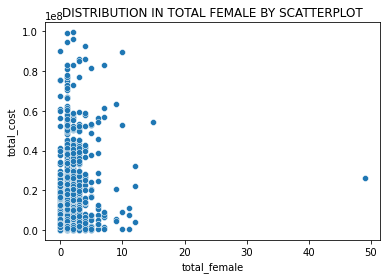

In [18]:
#visualize the total_female and total_male columns 
plt.title("DISTRIBUTION IN TOTAL_FEMALE BY DISTPLOT")
sns.distplot(train['total_female'])
plt.show()
plt.title("DISTRIBUTION IN TOTAL FEMALE COUNTPLOT")
sns.countplot(train['total_female'])
plt.show()
plt.title("DISTRIBUTION IN TOTAL FEMALE BY KDEPLOT")
sns.kdeplot(train['total_female'],shade=True,color="green")
plt.show()
plt.title("DISTRIBUTION IN TOTAL FEMALE BY SCATTERPLOT")
sns.scatterplot("total_female","total_cost",data=train)
plt.show()

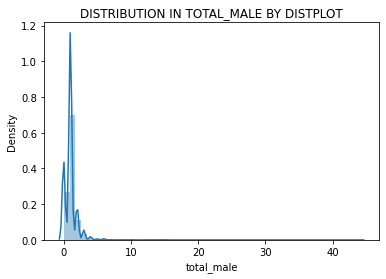

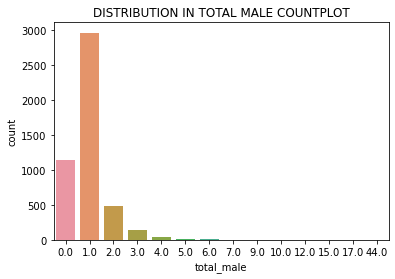

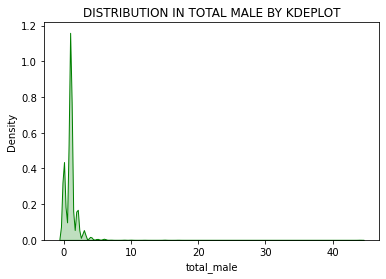

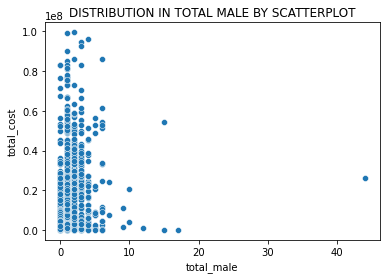

In [19]:
plt.title("DISTRIBUTION IN TOTAL_MALE BY DISTPLOT")
sns.distplot(train['total_male'])
plt.show()
plt.title("DISTRIBUTION IN TOTAL MALE COUNTPLOT")
sns.countplot(train['total_male'])
plt.show()
plt.title("DISTRIBUTION IN TOTAL MALE BY KDEPLOT")
sns.kdeplot(train['total_male'],shade=True,color="green")
plt.show()
plt.title("DISTRIBUTION IN TOTAL MALE BY SCATTERPLOT")
sns.scatterplot("total_male","total_cost",data=train)
plt.show()

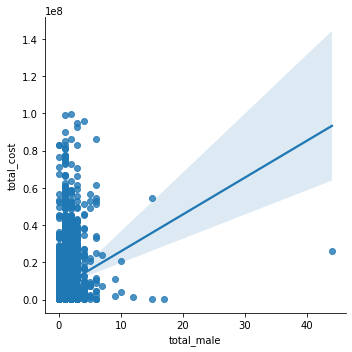

In [20]:
#visualize the regression of the total_male to the total_cost 
sns.lmplot("total_male","total_cost",data=train)
plt.show()

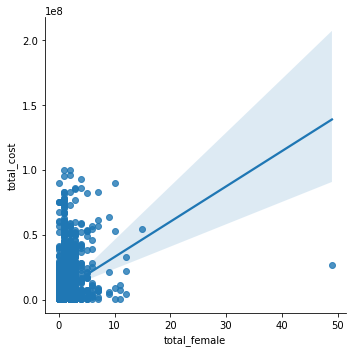

In [21]:

sns.lmplot("total_female","total_cost",data=train)
plt.show()

In [22]:
#function to spot out the outliers 
def outliers(data,variable):
    sns.boxenplot(data[variable])
    plt.show()

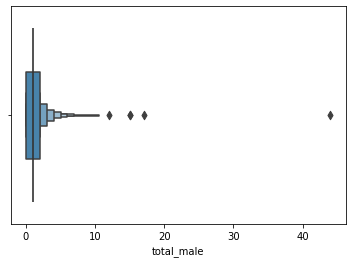

In [23]:
outliers(train,"total_male")

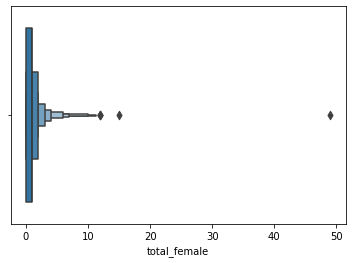

In [24]:
outliers(train,"total_female")

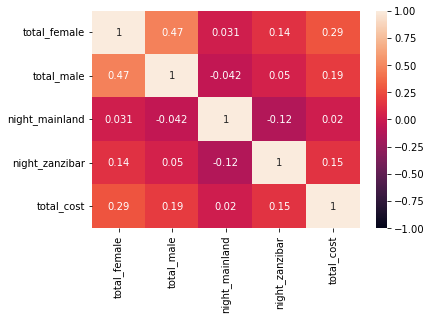

In [25]:
#checking the correration of the features
sns.heatmap(train.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

In [26]:
#concatenate the train and the test dataset 
y=train['total_cost']
del train['total_cost']
train['splitter']='train'
test['splitter']='test'
data=pd.concat([train,test]).reset_index(drop=True)
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,splitter
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,train
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",train
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,train
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,train
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,train


In [27]:
#imputing the null values
numerical_data=['total_female',"total_male"]
for x in numerical_data:
    data[x]=data[x].fillna(data[x].mode()[0])

In [28]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1441
total_female                0
total_male                  0
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           424
splitter                    0
dtype: int64

In [29]:
data.dtypes

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
splitter                  object
dtype: object

In [30]:
#imputing the null values for categorical data type
categ_null_values=("travel_with","most_impressing")
for x in categ_null_values:
    data[x]=data[x].fillna("None")

In [31]:
data.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
splitter                 0
dtype: int64

In [32]:
data.head(30)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,splitter
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,train
1,tour_10,UNITED KINGDOM,25-44,None,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",train
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,train
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,train
4,tour_1004,CHINA,1-24,None,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,train
5,tour_1005,UNITED KINGDOM,25-44,None,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,No,No,No,Yes,Yes,No,9.0,3.0,Cash,Yes,Wildlife,train
6,tour_1007,SOUTH AFRICA,45-64,Alone,0.0,1.0,Business,Mountain climbing,"Friends, relatives",Independent,No,No,No,No,No,No,No,9.0,0.0,Cash,Yes,Friendly People,train
7,tour_1008,UNITED STATES OF AMERICA,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10.0,3.0,Cash,Yes,Friendly People,train
8,tour_101,NIGERIA,25-44,Alone,0.0,1.0,Leisure and Holidays,Cultural tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,4.0,0.0,Cash,Yes,None,train
9,tour_1011,INDIA,25-44,Alone,1.0,0.0,Business,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,5.0,0.0,Credit Card,Yes,Friendly People,train


In [33]:
#checking the uniques values and counting 
for x in data.columns:
    l= len(data[x].unique())
    print(x,l)

ID 6410
country 118
age_group 5
travel_with 6
total_female 15
total_male 15
purpose 7
main_activity 9
info_source 8
tour_arrangement 2
package_transport_int 2
package_accomodation 2
package_food 2
package_transport_tz 2
package_sightseeing 2
package_guided_tour 2
package_insurance 2
night_mainland 69
night_zanzibar 37
payment_mode 4
first_trip_tz 2
most_impressing 8
splitter 2


In [34]:

lab_encode=(
    "tour_arrangement",
    "package_transport_int",
    "package_accomodation",
    "package_food",
    "package_transport_tz",
    "package_sightseeing",  
    "package_guided_tour",
    "package_insurance",
    "first_trip_tz",
    "age_group",  
    "payment_mode"
)

In [35]:
#transforming the categorical to numerical
encoder=LabelEncoder()
for x in lab_encode:
    data[x]=encoder.fit_transform(data[x])

In [36]:
data.dtypes

ID                        object
country                   object
age_group                  int64
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement           int64
package_transport_int      int64
package_accomodation       int64
package_food               int64
package_transport_tz       int64
package_sightseeing        int64
package_guided_tour        int64
package_insurance          int64
night_mainland           float64
night_zanzibar           float64
payment_mode               int64
first_trip_tz              int64
most_impressing           object
splitter                  object
dtype: object

In [37]:
for x in data.columns:
    l=len(data[x].unique())
    print(x,l)

ID 6410
country 118
age_group 5
travel_with 6
total_female 15
total_male 15
purpose 7
main_activity 9
info_source 8
tour_arrangement 2
package_transport_int 2
package_accomodation 2
package_food 2
package_transport_tz 2
package_sightseeing 2
package_guided_tour 2
package_insurance 2
night_mainland 69
night_zanzibar 37
payment_mode 4
first_trip_tz 2
most_impressing 8
splitter 2


In [38]:
colum_dummies=[
    "most_impressing",
    "info_source",  
    "main_activity",  
    "purpose",  
    "travel_with",  
    "country"
]

In [39]:
#converting the categorical values to the numerical values by using get_dummies function in pandas
data=pd.get_dummies(data,columns=colum_dummies,drop_first=True)

In [40]:
data.head()

,ID,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,splitter,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature","info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,country_ANGOLA,country_ARGENTINA,country_AUSTRALIA,country_AUSTRIA,country_BANGLADESH,country_BELGIUM,country_BERMUDA,country_BOSNIA,country_BOTSWANA,country_BRAZIL,country_BULGARIA,country_BURGARIA,country_BURUNDI,country_CANADA,country_CAPE VERDE,country_CHILE,country_CHINA,country_COLOMBIA,country_COMORO,country_CONGO,country_COSTARICA,country_CROATIA,country_CYPRUS,country_CZECH REPUBLIC,country_DENMARK,country_DJIBOUT,country_DOMINICA,country_DRC,country_EGYPT,country_ESTONIA,country_ETHIOPIA,country_FINLAND,country_FRANCE,country_GEORGIA,country_GERMANY,country_GHANA,country_GREECE,country_GUINEA,country_HAITI,country_HUNGARY,country_INDIA,country_INDONESIA,country_IRAN,country_IRAQ,country_IRELAND,country_ISRAEL,country_ITALY,country_IVORY COAST,country_JAMAICA,country_JAPAN,country_KENYA,country_KOREA,country_KUWAIT,country_LATVIA,country_LEBANON,country_LESOTHO,country_LIBERIA,country_LITHUANIA,country_LUXEMBOURG,country_MACEDONIA,country_MADAGASCAR,country_MALAWI,country_MALAYSIA,country_MALT,country_MAURITIUS,country_MEXICO,country_MONTENEGRO,country_MORROCO,country_MOZAMBIQUE,country_MYANMAR,country_NAMIBIA,country_NEPAL,country_NETHERLANDS,country_NEW ZEALAND,country_NIGER,country_NIGERIA,country_NORWAY,country_OMAN,country_PAKISTAN,country_PERU,country_PHILIPINES,country_POLAND,country_PORTUGAL,country_QATAR,country_ROMANIA,country_RUSSIA,country_RWANDA,country_SAUD ARABIA,country_SCOTLAND,country_SERBIA,country_SINGAPORE,country_SLOVAKIA,country_SLOVENIA,country_SOMALI,country_SOUTH AFRICA,country_SPAIN,country_SRI LANKA,country_SUDAN,country_SWAZILAND,country_SWEDEN,country_SWIZERLAND,country_TAIWAN,country_THAILAND,country_TRINIDAD TOBACCO,country_TUNISIA,country_TURKEY,country_UAE,country_UGANDA,country_UKRAIN,country_UNITED ARAB EMIRATES,country_UNITED KINGDOM,country_UNITED STATES OF AMERICA,country_URUGUAY,country_VIETNAM,country_YEMEN,country_ZAMBIA,country_ZIMBABWE
0,tour_0,3,1.0,1.0,0,0,0,0,0,0,0,0,13.0,0.0,0,0,train,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tour_10,2,1.0,0.0,0,0,0,0,0,0,0,0,14.0,7.0,0,1,train,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,tour_1000,2,0.0,1.0,0,0,0,0,0,0,0,0,1.0,31.0,0,0,train,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [41]:
data.dtypes

ID                                                       object
age_group                                                 int64
total_female                                            float64
total_male                                              float64
tour_arrangement                                          int64
package_transport_int                                     int64
package_accomodation                                      int64
package_food                                              int64
package_transport_tz                                      int64
package_sightseeing                                       int64
package_guided_tour                                       int64
package_insurance                                         int64
night_mainland                                          float64
night_zanzibar                                          float64
payment_mode                                              int64
first_trip_tz                           

In [42]:
#feature engineering 
data['total_person']=data['total_male']+data['total_female']
data['total_person']=data['total_person'].astype("int")
data["total_nights_spent"]=data['night_mainland']+data['night_zanzibar']

In [43]:
#converting the data type of the total_male and total_female to int 
data['total_female']=data['total_female'].astype("int")
data['total_male']=data['total_male'].astype('int')

In [44]:
data.dtypes

ID                                                       object
age_group                                                 int64
total_female                                              int64
total_male                                                int64
tour_arrangement                                          int64
package_transport_int                                     int64
package_accomodation                                      int64
package_food                                              int64
package_transport_tz                                      int64
package_sightseeing                                       int64
package_guided_tour                                       int64
package_insurance                                         int64
night_mainland                                          float64
night_zanzibar                                          float64
payment_mode                                              int64
first_trip_tz                           

In [45]:
data.head(10)

,ID,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,splitter,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature","info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,country_ANGOLA,country_ARGENTINA,country_AUSTRALIA,country_AUSTRIA,country_BANGLADESH,country_BELGIUM,country_BERMUDA,country_BOSNIA,country_BOTSWANA,country_BRAZIL,country_BULGARIA,country_BURGARIA,country_BURUNDI,country_CANADA,country_CAPE VERDE,country_CHILE,country_CHINA,country_COLOMBIA,country_COMORO,country_CONGO,country_COSTARICA,country_CROATIA,country_CYPRUS,country_CZECH REPUBLIC,country_DENMARK,country_DJIBOUT,country_DOMINICA,country_DRC,country_EGYPT,country_ESTONIA,country_ETHIOPIA,country_FINLAND,country_FRANCE,country_GEORGIA,country_GERMANY,country_GHANA,country_GREECE,country_GUINEA,country_HAITI,country_HUNGARY,country_INDIA,country_INDONESIA,country_IRAN,country_IRAQ,country_IRELAND,country_ISRAEL,country_ITALY,country_IVORY COAST,country_JAMAICA,country_JAPAN,country_KENYA,country_KOREA,country_KUWAIT,country_LATVIA,country_LEBANON,country_LESOTHO,country_LIBERIA,country_LITHUANIA,country_LUXEMBOURG,country_MACEDONIA,country_MADAGASCAR,country_MALAWI,country_MALAYSIA,country_MALT,country_MAURITIUS,country_MEXICO,country_MONTENEGRO,country_MORROCO,country_MOZAMBIQUE,country_MYANMAR,country_NAMIBIA,country_NEPAL,country_NETHERLANDS,country_NEW ZEALAND,country_NIGER,country_NIGERIA,country_NORWAY,country_OMAN,country_PAKISTAN,country_PERU,country_PHILIPINES,country_POLAND,country_PORTUGAL,country_QATAR,country_ROMANIA,country_RUSSIA,country_RWANDA,country_SAUD ARABIA,country_SCOTLAND,country_SERBIA,country_SINGAPORE,country_SLOVAKIA,country_SLOVENIA,country_SOMALI,country_SOUTH AFRICA,country_SPAIN,country_SRI LANKA,country_SUDAN,country_SWAZILAND,country_SWEDEN,country_SWIZERLAND,country_TAIWAN,country_THAILAND,country_TRINIDAD TOBACCO,country_TUNISIA,country_TURKEY,country_UAE,country_UGANDA,country_UKRAIN,country_UNITED ARAB EMIRATES,country_UNITED KINGDOM,country_UNITED STATES OF AMERICA,country_URUGUAY,country_VIETNAM,country_YEMEN,country_ZAMBIA,country_ZIMBABWE,total_person,total_nights_spent
0,tour_0,3,1,1,0,0,0,0,0,0,0,0,13.0,0.0,0,0,train,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,13.0
1,tour_10,2,1,0,0,0,0,0,0,0,0,0,14.0,7.0,0,1,train,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,21.0
2,tour_1000,2,0,1,0,0,0,0,0,0,0,0,1.0,31.0,0,0,train,1,0,0,0,0,0,0,0,0

In [46]:
data.info() #looking the information of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Columns: 169 entries, ID to total_nights_spent
dtypes: float64(3), int64(14), object(2), uint8(150)
memory usage: 1.8+ MB


In [47]:
#spliiting the data set into original one 
train=data[data['splitter']=="train"]
test=data[data['splitter']=="test"]

In [48]:
train.head()

,ID,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,splitter,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature","info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,country_ANGOLA,country_ARGENTINA,country_AUSTRALIA,country_AUSTRIA,country_BANGLADESH,country_BELGIUM,country_BERMUDA,country_BOSNIA,country_BOTSWANA,country_BRAZIL,country_BULGARIA,country_BURGARIA,country_BURUNDI,country_CANADA,country_CAPE VERDE,country_CHILE,country_CHINA,country_COLOMBIA,country_COMORO,country_CONGO,country_COSTARICA,country_CROATIA,country_CYPRUS,country_CZECH REPUBLIC,country_DENMARK,country_DJIBOUT,country_DOMINICA,country_DRC,country_EGYPT,country_ESTONIA,country_ETHIOPIA,country_FINLAND,country_FRANCE,country_GEORGIA,country_GERMANY,country_GHANA,country_GREECE,country_GUINEA,country_HAITI,country_HUNGARY,country_INDIA,country_INDONESIA,country_IRAN,country_IRAQ,country_IRELAND,country_ISRAEL,country_ITALY,country_IVORY COAST,country_JAMAICA,country_JAPAN,country_KENYA,country_KOREA,country_KUWAIT,country_LATVIA,country_LEBANON,country_LESOTHO,country_LIBERIA,country_LITHUANIA,country_LUXEMBOURG,country_MACEDONIA,country_MADAGASCAR,country_MALAWI,country_MALAYSIA,country_MALT,country_MAURITIUS,country_MEXICO,country_MONTENEGRO,country_MORROCO,country_MOZAMBIQUE,country_MYANMAR,country_NAMIBIA,country_NEPAL,country_NETHERLANDS,country_NEW ZEALAND,country_NIGER,country_NIGERIA,country_NORWAY,country_OMAN,country_PAKISTAN,country_PERU,country_PHILIPINES,country_POLAND,country_PORTUGAL,country_QATAR,country_ROMANIA,country_RUSSIA,country_RWANDA,country_SAUD ARABIA,country_SCOTLAND,country_SERBIA,country_SINGAPORE,country_SLOVAKIA,country_SLOVENIA,country_SOMALI,country_SOUTH AFRICA,country_SPAIN,country_SRI LANKA,country_SUDAN,country_SWAZILAND,country_SWEDEN,country_SWIZERLAND,country_TAIWAN,country_THAILAND,country_TRINIDAD TOBACCO,country_TUNISIA,country_TURKEY,country_UAE,country_UGANDA,country_UKRAIN,country_UNITED ARAB EMIRATES,country_UNITED KINGDOM,country_UNITED STATES OF AMERICA,country_URUGUAY,country_VIETNAM,country_YEMEN,country_ZAMBIA,country_ZIMBABWE,total_person,total_nights_spent
0,tour_0,3,1,1,0,0,0,0,0,0,0,0,13.0,0.0,0,0,train,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,13.0
1,tour_10,2,1,0,0,0,0,0,0,0,0,0,14.0,7.0,0,1,train,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,21.0
2,tour_1000,2,0,1,0,0,0,0,0,0,0,0,1.0,31.0,0,0,train,1,0,0,0,0,0,0,0,0

In [49]:
test.head()

,ID,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,splitter,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature","info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,country_ANGOLA,country_ARGENTINA,country_AUSTRALIA,country_AUSTRIA,country_BANGLADESH,country_BELGIUM,country_BERMUDA,country_BOSNIA,country_BOTSWANA,country_BRAZIL,country_BULGARIA,country_BURGARIA,country_BURUNDI,country_CANADA,country_CAPE VERDE,country_CHILE,country_CHINA,country_COLOMBIA,country_COMORO,country_CONGO,country_COSTARICA,country_CROATIA,country_CYPRUS,country_CZECH REPUBLIC,country_DENMARK,country_DJIBOUT,country_DOMINICA,country_DRC,country_EGYPT,country_ESTONIA,country_ETHIOPIA,country_FINLAND,country_FRANCE,country_GEORGIA,country_GERMANY,country_GHANA,country_GREECE,country_GUINEA,country_HAITI,country_HUNGARY,country_INDIA,country_INDONESIA,country_IRAN,country_IRAQ,country_IRELAND,country_ISRAEL,country_ITALY,country_IVORY COAST,country_JAMAICA,country_JAPAN,country_KENYA,country_KOREA,country_KUWAIT,country_LATVIA,country_LEBANON,country_LESOTHO,country_LIBERIA,country_LITHUANIA,country_LUXEMBOURG,country_MACEDONIA,country_MADAGASCAR,country_MALAWI,country_MALAYSIA,country_MALT,country_MAURITIUS,country_MEXICO,country_MONTENEGRO,country_MORROCO,country_MOZAMBIQUE,country_MYANMAR,country_NAMIBIA,country_NEPAL,country_NETHERLANDS,country_NEW ZEALAND,country_NIGER,country_NIGERIA,country_NORWAY,country_OMAN,country_PAKISTAN,country_PERU,country_PHILIPINES,country_POLAND,country_PORTUGAL,country_QATAR,country_ROMANIA,country_RUSSIA,country_RWANDA,country_SAUD ARABIA,country_SCOTLAND,country_SERBIA,country_SINGAPORE,country_SLOVAKIA,country_SLOVENIA,country_SOMALI,country_SOUTH AFRICA,country_SPAIN,country_SRI LANKA,country_SUDAN,country_SWAZILAND,country_SWEDEN,country_SWIZERLAND,country_TAIWAN,country_THAILAND,country_TRINIDAD TOBACCO,country_TUNISIA,country_TURKEY,country_UAE,country_UGANDA,country_UKRAIN,country_UNITED ARAB EMIRATES,country_UNITED KINGDOM,country_UNITED STATES OF AMERICA,country_URUGUAY,country_VIETNAM,country_YEMEN,country_ZAMBIA,country_ZIMBABWE,total_person,total_nights_spent
4809,tour_1,3,1,1,1,1,1,1,1,1,1,1,10.0,3.0,0,1,test,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,13.0
4810,tour_100,2,0,4,1,1,1,0,0,0,0,0,13.0,0.0,0,0,test,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,13.0
4811,tour_1001,2,3,0,0,0,0,0,0,0,0,0,7.0,14.0,0,0,test,0,0,0,1,0,

In [50]:
train.shape ,test.shape ,samplesub.shape

((4809, 169), (1601, 169), (1601, 2))

In [51]:
del train['ID']
del train['splitter']
del test['ID']
del test['splitter']

In [52]:
train.shape ,test.shape ,samplesub.shape 

((4809, 167), (1601, 167), (1601, 2))

In [66]:
# from sklearn.model_selection import KFold
# scores=[]
# predictions=[]
# kf=KFold(n_splits=10)
# counter=1
# for train_index ,test_index in kf.split(train,y):
#     x_train,x_test=train.iloc[train_index],train.iloc[test_index]
#     y_train,y_test=y.iloc[train_index],y.iloc[test_index]
#     model=LinearRegression()
#     model.fit(x_train,y_train)
#     y_preds=model.predict(x_test)
#     predi_f=model.predict(test)
#     predi_fx=model.predict(test)
#     score=mean_absolute_error(y_test,y_preds)
#     predictions.append(predi_fx)
#     scores.append(score)
# error=np.mean(scores)
# print("Error:",error)

Error: 369823002063.8898


In [68]:
# predictions=pd.DataFrame(predictions)
# predictions.head()

0             1             2             3             4             5             6             7             8             9             10            11            12            13            14            15            16            17            18            19            20            21            22             23            24            25            26            27            28            29            30            31            32            33            34            35            36            37            38            39            40            41            42            43             44            45            46            47            48            49            50            51            52            53            54            55            56            57            58            59             60            61            62            63            64            65            66            67            68            69            70            71            72            73            74            75            76            77            78            79            80            81            82            83            84            85            86            87            88            89            90            91            92            93            94            95            96            97             98            99            100           101           102           103           104           105           106           107           108           109           110           111           112           113           114           115           116           117           118           119           120           121            122           123           124           125           126           127           128            129           130           131           132           133           134           135           136           137           138           139           140           141           142           143           144           145           146           147           148           149           150           151           152           153           154           155           156           157           158           159           160           161           162           163           164           165           166           167           168            169           170           171           172           173           174           175           176           177           178           179           180           181           182           183           184           185           186           187           188           189           190           191           192           193           194           195           196           197           198           199           200           201           202           203           204           205           206           207           208           209            210           211           212           213            214           215           216           217           218           219           220           221           222           223           224           225           226           227            228           229           230           231           232           233           234           235           236           237           238           239           240           241           242           243           244           245           246           247           248           249           250           251           252           253           254           255            256           257           258           259           260           261           262           263           264           265           266           267           268           269           270           271           272           273           274           275           276           277           278           279           280           281           282           283           284          

In [82]:
# np.mean(predictions[:1]).head()

0    2.222090e+07
1    1.543793e+07
2    7.843944e+06
3    6.411368e+06
4    1.652132e+07
dtype: float64

In [57]:
# predx=pd.DataFrame(predi_f)
# predx.head()

,0
0,2.232448e+07
1,1.513190e+07
2,7.709953e+06
3,7.135489e+06
4,1.629926e+07


In [ ]:
#Splitting data and validate the model performance by Using K-fold Cross validation.
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)
scores=[]
n_sp=1
for train_index,test_index in kf.split(train,y):
    x_train,x_test=train.iloc[train_index],train.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_preds=model.predict(x_test)
    error=mean_absolute_error(y_preds,y_test)
    scores.append(error)
    predictions=model.predict(test)
    print("FOLD :",n_sp)
    print("Error :",error)
    n_sp=n_sp+1
total_error=np.mean(scores)
print("Total Error is :",total_error)

FOLD : 1
Error : 496671611049.87164
FOLD : 2
Error : 15597223700.276764
FOLD : 3
Error : 1151810504711.7344
FOLD : 4
Error : 105094313957.62155
FOLD : 5
Error : 659732358724.2368
FOLD : 6
Error : 279575026055.9766
FOLD : 7
Error : 13855663562.357637
FOLD : 8
Error : 221492258055.4633
FOLD : 9
Error : 5391051.830616505
FOLD : 10
Error : 754395669769.5284
Total Error is : 369823002063.8898


In [ ]:
#spliting the train data into train set and testing set by using train_test_split.
x_train1,x_test1,y_train1,y_test1=train_test_split(train,y,random_state=1999,test_size=0.25)

In [ ]:
#data modelling using LiearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)
model1.get_params() #getting the defaults parameters of the model

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [ ]:
y_preds1=model.predict(x_test)
error1=mean_absolute_error(y_test,y_preds)
print("Error:",error1)

Error: 754395669769.5284


In [ ]:
rmserror=np.sqrt(error)
print("The root mean squared error is :",rmserror)

The root mean squared error is : 868559.5372624311


In [ ]:
predictions=model.predict(test) #make predictions for actual data set .
predictions

array([22324480.58871887, 15131904.58871887,  7709952.58871887, ...,
       -2353919.41128113,  1345792.58871887,  8893696.58871887])

In [ ]:
predictions=pd.DataFrame(predictions)
predictions.head() #converting the predictions from array to dataframe

,0
0,2.232448e+07
1,1.513190e+07
2,7.709953e+06
3,7.135489e+06
4,1.629926e+07


In [ ]:
samplesub.head()

,ID,total_cost
0,tour_1,0
1,tour_100,0
2,tour_1001,0
3,tour_1006,0
4,tour_1009,0


In [ ]:
samplesub['total_cost']=predictions
samplesub.head() #prepare the submission file

,ID,total_cost
0,tour_1,2.232448e+07
1,tour_100,1.513190e+07
2,tour_1001,7.709953e+06
3,tour_1006,7.135489e+06
4,tour_1009,1.629926e+07


In [ ]:
samplesub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1601 non-null   object 
 1   total_cost  1601 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.1+ KB


In [ ]:
samplesub.to_csv("tourism.csv",index=False) #save the prediction into csv, ready for submitting .

<h1>What Next ?</h1>
<p>
- Study about Regression Supervised Machine Learning Algorithms and try those algorithms.<br><br>
- Study about EDA(Exploratory Data Analyis and try to apply and Explore more the data.<br> <br>
- Study about Ensambling techniques in Machine Learning and try to apply them here and see <br> <br>
- Study about Cross validation (k-folds) and try to apply here .<br><br>
- Study about data cleaning and feature engineering and try to apply also them here .<br><br>
- Study about Hyperparameters tuning in different algorithms that you decided to use .<br><br>
- Study about Grid search and random Search and try to apply . <br><br>
-Try other challenges in Zindi for regression and see how it works. 
</p>